In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

class Perceptron:
    def __init__(self, eta=0.10, epochs=50, is_verbose=False):
        self.eta=eta
        self.epochs=epochs
        self.is_verbose=is_verbose
        self.list_of_errors=[]
    
    def predict(self, x):
        ones = np.ones((x.shape[0], 1))
        x_1 = np.append(x.copy(), ones, axis=1)
        return np.where(self.get_activation(x_1)>0, 1, -1)
    
    def get_activation(self, x):
        activation = np.dot(x, self.w)
        return activation
    
    def fit(self, X, y):
        self.list_of_errors=[]
        ones=np.ones((X.shape[0],1))
        X_1 = np.append(X.copy(), ones, axis=1)
        
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
            error=0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y-activation).sum()/2.0
                
            self.list_of_errors.append(error)
                
            if(self.is_verbose):
                print('Epoch: {}, weights: {}, error: {}'.format(
                e, self.w, error))

In [47]:
diag = pd.read_csv(r'C:\PythonScripts\course-files2\breast_cancer.csv')
diag.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
X=diag[['area_mean','area_se','texture_mean','concavity_worst','concavity_mean']].values
X[:10]

array([[1.001e+03, 1.534e+02, 1.038e+01, 7.119e-01, 3.001e-01],
       [1.326e+03, 7.408e+01, 1.777e+01, 2.416e-01, 8.690e-02],
       [1.203e+03, 9.403e+01, 2.125e+01, 4.504e-01, 1.974e-01],
       [3.861e+02, 2.723e+01, 2.038e+01, 6.869e-01, 2.414e-01],
       [1.297e+03, 9.444e+01, 1.434e+01, 4.000e-01, 1.980e-01],
       [4.771e+02, 2.719e+01, 1.570e+01, 5.355e-01, 1.578e-01],
       [1.040e+03, 5.391e+01, 1.998e+01, 3.784e-01, 1.127e-01],
       [5.779e+02, 5.096e+01, 2.083e+01, 2.678e-01, 9.366e-02],
       [5.198e+02, 2.432e+01, 2.182e+01, 5.390e-01, 1.859e-01],
       [4.759e+02, 2.394e+01, 2.404e+01, 1.105e+00, 2.273e-01]])

In [48]:
diag['diagnosis']=diag['diagnosis'].apply(lambda x: 1 if x=='M' else -1)
diag.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
y=diag['diagnosis'].values
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Epoch: 0, weights: [0.6382324  0.70661974 0.58557459 0.66634081 0.78872612 0.9033902 ], error: 166511584.81262207
Epoch: 1, weights: [0.41704399 0.69060128 0.58033281 0.66625455 0.78869503 0.90312893], error: 77922645.170874
Epoch: 2, weights: [0.26578839 0.67955281 0.57675071 0.6661956  0.78867374 0.9029505 ], error: 36492519.8134683
Epoch: 3, weights: [0.16235714 0.67190317 0.57430358 0.66615532 0.78865914 0.90282873], error: 17116991.339772105
Epoch: 4, weights: [0.09163111 0.66657792 0.57263262 0.66612783 0.78864913 0.90274571], error: 8055658.681188801
Epoch: 5, weights: [0.04327091 0.66284227 0.57149244 0.66610906 0.78864225 0.90268918], error: 3817929.7570142834
Epoch: 6, weights: [0.01020585 0.66019374 0.57071523 0.66609627 0.78863751 0.90265077], error: 1836038.6774061215
Epoch: 7, weights: [-0.01239946  0.65828869  0.57018624  0.66608756  0.78863424  0.90262474], error: 909127.3985916212
Epoch: 8, weights: [-0.02785176  0.65689213  0.56982699  0.66608165  0.78863196  0.902607

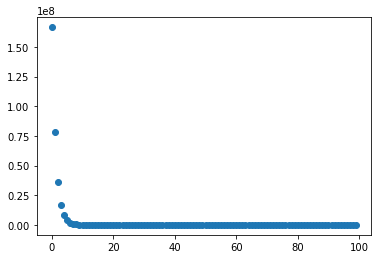

In [71]:
perceptron = Perceptron(eta=0.000000001,epochs=100, is_verbose=True)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaler.mean_

array([-2.18532476e-16, -1.31119486e-16,  6.86816353e-17,  7.49254203e-17,
        4.99502802e-17])

In [82]:
X_std=scaler.transform(X)

Epoch: 0, weights: [-0.26042367  0.11862296  0.2303981   0.18905873 -0.63598802  0.05355299], error: 1021.7110740071619
Epoch: 1, weights: [ 0.37485265  0.61927243  0.43483826  0.77485023  0.03425916 -0.12191866], error: 574.4347844651373
Epoch: 2, weights: [-0.04908727  0.15178841  0.11719687  0.36014227 -0.43057831 -0.19754694], error: 369.5978490079598
Epoch: 3, weights: [ 0.34144492  0.44444123  0.27788448  0.69573611 -0.03793566 -0.23014273], error: 259.44705529073804
Epoch: 4, weights: [ 0.09603563  0.15754972  0.10747632  0.43729905 -0.32042682 -0.24419152], error: 195.71545944473047
Epoch: 5, weights: [ 0.33764666  0.3266898   0.2141594   0.63165263 -0.08627078 -0.25024654], error: 157.67970294354149
Epoch: 6, weights: [ 0.19720499  0.14897287  0.11740824  0.47181909 -0.25520575 -0.25285626], error: 134.63671340238133
Epoch: 7, weights: [ 0.34781479  0.24499019  0.18408907  0.58439088 -0.11371067 -0.25398105], error: 120.53669874862865
Epoch: 8, weights: [ 0.26877031  0.1335734

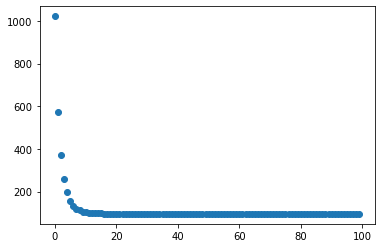

In [84]:
perceptron = Perceptron(eta=0.001,epochs=100, is_verbose=True)
perceptron.fit(X_std,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

In [87]:
y_test

array([-1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1], dtype=int64)

Epoch: 0, weights: [ 0.05430627 -0.1715678   0.08607238 -0.07719643 -0.30157205 -0.04802484], error: 1129.8854422994805
Epoch: 1, weights: [ 0.53429427  0.24783811  0.30219828  0.39583983  0.21768661 -0.13960359], error: 397.8999553865192
Epoch: 2, weights: [ 0.26509064 -0.02925941  0.13637137  0.18755294 -0.04076081 -0.20585732], error: 174.47569776498648
Epoch: 3, weights: [ 0.41534769  0.09202544  0.20105235  0.33493591  0.11766316 -0.23175134], error: 106.1705493421426
Epoch: 4, weights: [ 0.33731311  0.00222019  0.14959232  0.27344861  0.03846564 -0.25077463], error: 85.22100167837311
Epoch: 5, weights: [ 0.38713063  0.034787    0.16864036  0.31970959  0.08609438 -0.25797235], error: 78.74832939473416
Epoch: 6, weights: [ 0.3671866   0.00364597  0.15243129  0.30185117  0.06111655 -0.26334854], error: 76.71232882718729
Epoch: 7, weights: [ 0.38601752  0.01031315  0.15782957  0.31657992  0.07473595 -0.26527612], error: 76.04310875533719
Epoch: 8, weights: [ 0.38334392 -0.00205623  0

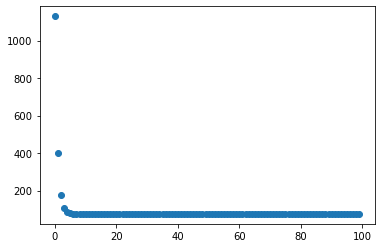

In [100]:
perceptron = Perceptron(eta=0.001,epochs=100, is_verbose=True)
perceptron.fit(X_train,y_train)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [107]:
y_pred=perceptron.predict(X_test)
y_pred

array([-1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [119]:
y_pred=perceptron.predict(X_test)
good=y_test[y_test==y_pred].size
total=y_test.size
print('result: {}'.format(100*good/total))

result: 90.35087719298245
